In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns

In [6]:
df = pd.read_csv("iap.csv")
df

# bfp -> body fat percentage
# 0 -> male, 1 -> female
# only s11 and iap data is accurate. age, gender, bfp is selected at random within reasonable ranges to show how model works

,s11 (dB),age,gender,bfp,iap (mmHg)
0,-15.9380,25,1,25,4
1,-17.4341,45,1,23,5
2,-18.2730,62,1,32,6
3,-19.5679,20,0,13,7
4,-19.9835,42,0,18,8
5,-22.7465,39,1,24,10
6,-24.0834,55,1,28,12
7,-26.6697,24,0,19,14


In [17]:
reg = linear_model.LinearRegression()
reg.fit(df[['s11 (dB)', 'age', 'gender', 'bfp']], df['iap (mmHg)'])

LinearRegression()

In [4]:
# ---   ---Linear Model---   ---
# iap = m1*s11 + m2*age + m3*gender + m4*bfp + k

'  Linear Model\n\niap = m1*s11 + m2*age + m3*gender + m4*bfp + k   '

In [18]:
# m1, m2, m3, m4 of the linear equation
reg.coef_

array([-9.49470967e-01,  9.49191403e-04, -4.16462945e-01,  4.03365996e-02])

In [19]:
# k (intercept) of the linear equation
reg.intercept_

-11.991157431199067

In [21]:
'''   Final Result - Estimation of IAP from Data   '''

# IAP estimation at -19.224 dB S11, 24 years, female, bfp = 21%
reg.predict([[-19.224, 24, 1, 21]])

array([6.71485868])

In [22]:
# Graph

<AxesSubplot:xlabel='iap (mmHg)', ylabel='s11 (dB)'>

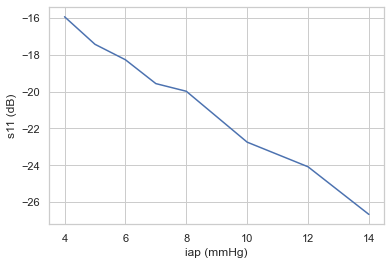

In [24]:
sns.set_theme(style="whitegrid")
sns.lineplot(y=df['s11 (dB)'], x=df['iap (mmHg)'])

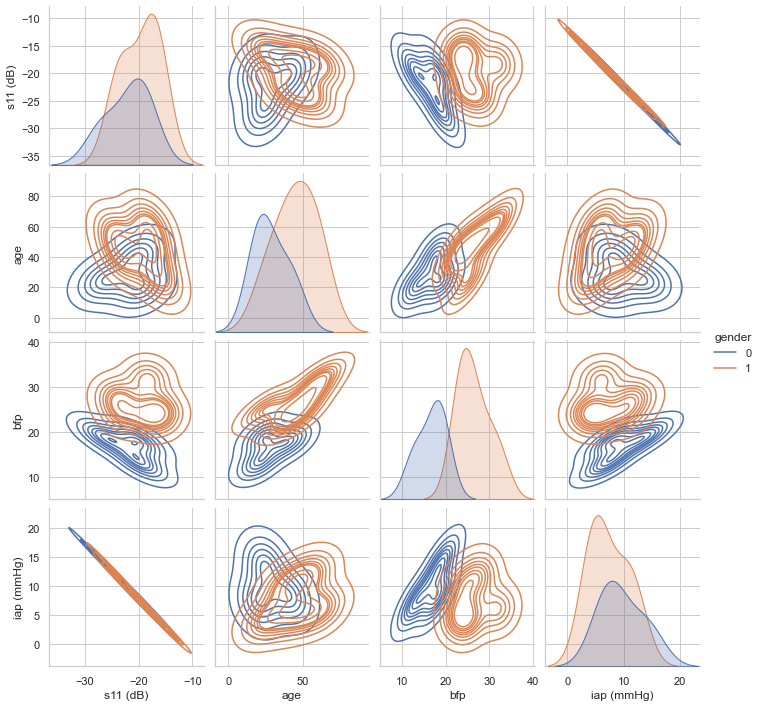

In [30]:
sns.pairplot(df, hue = 'gender', kind = 'kde')
# 0 = male
# 1 = female